##Challenge 1

We are fitting and checking the predictions on the exact same dataset! Divide your data into two sets: a training and a test set (roughly 75% training, %25 test). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime

movies = pd.read_csv('2013_movies.csv', parse_dates={'Date':['ReleaseDate']})
movies['Date'] = movies['Date'].astype(datetime)

In [2]:
movies.head()

,Date,Title,Budget,DomesticTotalGross,Director,Rating,Runtime
0,2013-11-22,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146
1,2013-05-03,Iron Man 3,200000000,409013994,Shane Black,PG-13,129
2,2013-11-22,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108
3,2013-07-03,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98
4,2013-06-14,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143


In [3]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation

In [4]:
movies_clean = movies.dropna()
headers = list(movies_clean.columns.values)

In [5]:
train_test = cross_validation.train_test_split(movies_clean, test_size = .25, train_size = .75)

In [6]:
train_movies = train_test[0]
test_movies = train_test[1]

In [7]:
print len(train_movies)
print len(test_movies)

65
22


In [8]:
train_df = pd.DataFrame(train_movies, columns = headers)
test_df = pd.DataFrame(test_movies, columns = headers)

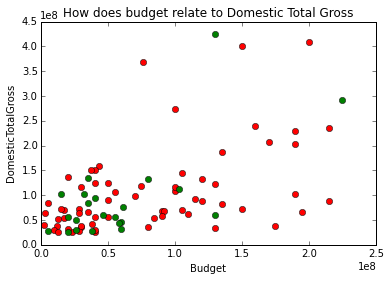

In [9]:
from sklearn.linear_model import LinearRegression

X_train = train_df[['Budget']].astype(float)
Y_train = train_df['DomesticTotalGross'].astype(float)

X_test = test_df[['Budget']].astype(float)
Y_test = test_df['DomesticTotalGross'].astype(float)

plt.plot(X_train, Y_train, 'ro')
plt.plot(X_test, Y_test, 'go')

plt.title("How does budget relate to Domestic Total Gross")
plt.xlabel("Budget")
plt.ylabel("DomesticTotalGross")

In [10]:
type(X_train)

pandas.core.frame.DataFrame

In [11]:
from sklearn.linear_model import LinearRegression

X_train = train_df[['Budget']].astype(float)
Y_train = train_df['DomesticTotalGross'].astype(float)

X_test = test_df[['Budget']].astype(float)
Y_test = test_df['DomesticTotalGross'].astype(float)

sk_linmodel = LinearRegression()
sk_linmodel.fit(X_train, Y_train)

print 'coefficient:       \t %g' %sk_linmodel.coef_  
print 'intercept:         \t %g' %sk_linmodel.intercept_
print 'R^2 Train:         \t %g' %sk_linmodel.score(X_train,Y_train)
print 'R^2 Test:          \t %g' %sk_linmodel.score(X_test,Y_test)

coefficient:       	 0.684529
intercept:         	 5.12624e+07
R^2 Train:         	 0.241043
R^2 Test:          	 0.362133


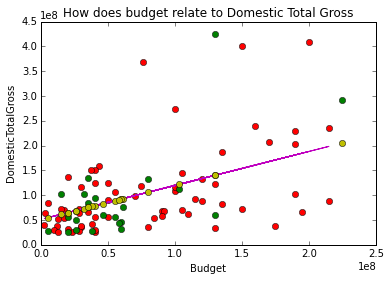

In [12]:
X_train = train_df[['Budget']].astype(float)
Y_train = train_df['DomesticTotalGross'].astype(float)

X_test = test_df[['Budget']].astype(float)
Y_test = test_df['DomesticTotalGross'].astype(float)

plt.plot(X_train, Y_train, 'ro')
plt.plot(X_test, Y_test, 'go')
plt.plot(X_train, sk_linmodel.predict(X_train), 'm-')
plt.plot(X_test, sk_linmodel.predict(X_test), 'yo')

plt.title("How does budget relate to Domestic Total Gross")
plt.xlabel("Budget")
plt.ylabel("DomesticTotalGross")

My model fit my training set with an R^2 of .33, my test set fit less well with an R^2 of .11

In [13]:
print 'R^2 Train:         \t %g' %sk_linmodel.score(X_train,Y_train)
print 'R^2 Test:          \t %g' %sk_linmodel.score(X_test,Y_test)

R^2 Train:         	 0.241043
R^2 Test:          	 0.362133


##Challenge 2

Build a model that also uses average director gross as a feature (one of the predictor variables). Fit and evaluate. Would you use this model to predict gross revenues of upcoming movies?

In [22]:
groups_by_director = movies_clean.groupby('Director')
director_gross = groups_by_director['DomesticTotalGross'].mean()

#director_gross

movies_clean['Average Director Gross'] = movies_clean['Director'].apply(lambda x: director_gross[x])

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
movies_clean.head()

,Date,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,Average Director Gross
0,2013-11-22,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,424668047
1,2013-05-03,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,409013994
2,2013-11-22,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,400738009
3,2013-07-03,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,368061265
4,2013-06-14,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,291045518


In [17]:
director_gross = groups_by_director['DomesticTotalGross'].count()
director_gross.sort('Title', inplace = True, ascending = False)

director_gross.head()
#len(director_gross)

Director
Malcolm D. Lee    2
James Wan         2
Zack Snyder       1
Harald Zwart      1
Edgar Wright      1
Name: DomesticTotalGross, dtype: int64

Only two directors with more than 1 film

In [18]:
movies_clean['Ones'] = 1.0

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [19]:
import statsmodels.formula.api as sm

In [20]:
X = movies_clean[['Budget', 'Average Director Gross', 'Ones']]
Y = movies_clean['DomesticTotalGross']
linmodel = sm.OLS(Y, X).fit()
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.273e+04
Date:                Wed, 05 Aug 2015   Prob (F-statistic):          5.19e-105
Time:                        11:28:36   Log-Likelihood:                -1465.7
No. Observations:                  87   AIC:                             2937.
Df Residuals:                      84   BIC:                             2945.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Budget                     0.0016      0.011      0.144      0.885        -0.020     0.023
Average Director Gross     0.9994      0.007    135.083      0.000         0.985     1.014
Ones                   -5.987e+04   9.45e+05     -0.063      0.950     -1.94e+06  1.82e+06
==============================================================================
Omnibus:                       40.173   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1598.288
Skew:                           0.053   Prob(JB):                         0.00
Kurtosis:                      23.998   Cond. No.                     2.74e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I would not use this as a feature to predict average domestic gross; for every director where they've directed only one movie (all but two directors) we're using the gross to predict itself. The R^2 is almost 1.00, which seems like it's a great model, but really it's using a value to predict the same value. If we had a larger data set of movies to pull from where directors had multiple movies to average, it would be a better predictor.